In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Zip_Zhvi_AllHomes.csv') # ZHVI All Homes (SFR, Condo/Co-op) Time Series ($) with ZIP CODE resolution

In [3]:
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1134900.0,1118800,1108500,1110700,1128700,1174700,1236300,1281400,1290800,1282300
1,84654,60657,Chicago,IL,Chicago,Cook,2,146700.0,146500.0,146300.0,...,318100.0,318500,319600,321100,323100,324900,325600,325000,325600,327000
2,84616,60614,Chicago,IL,Chicago,Cook,3,198000.0,195500.0,194200.0,...,415200.0,414700,415400,410700,400400,402400,411400,411800,412300,418200
3,93144,79936,El Paso,TX,El Paso,El Paso,4,70800.0,71000.0,71000.0,...,114600.0,115000,115000,114700,114600,114700,114500,114200,114100,113900
4,84640,60640,Chicago,IL,Chicago,Cook,5,102300.0,101300.0,100700.0,...,200200.0,201700,203600,205000,204700,204200,204700,206700,209500,212000
5,91733,77084,Houston,TX,Houston,Harris,6,75600.0,75400.0,75100.0,...,158900.0,156900,154700,153600,154200,156800,158400,159400,160400,160400
6,97564,94109,San Francisco,CA,San Francisco,San Francisco,7,298200.0,295700.0,296400.0,...,1125700.0,1129000,1130700,1134300,1141500,1147300,1150500,1148100,1139600,1129800
7,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,8,NaN,NaN,NaN,...,304400.0,305600,307600,310000,312300,314400,315300,315100,316100,318700
8,62037,11226,New York,NY,New York,Kings,9,NaN,NaN,NaN,...,610900.0,611000,614200,625200,639700,649800,650700,646500,648100,653300
9,91940,77449,Cypress,TX,Houston,Harris,10,72100.0,72300.0,72100.0,...,161300.0,159000,156400,155300,156500,159500,161100,161800,162600,162700


In [4]:
df.shape

(15377, 265)

In [5]:
len(df.State.unique())

51

In [6]:
zipsPerState = pd.DataFrame(df['State'].groupby(df.State).count())
zipsPerState.sort_values(by='State', inplace=True)
zipsPerState.columns = ['number_of_zips']
zipsPerState.reset_index(inplace=True)

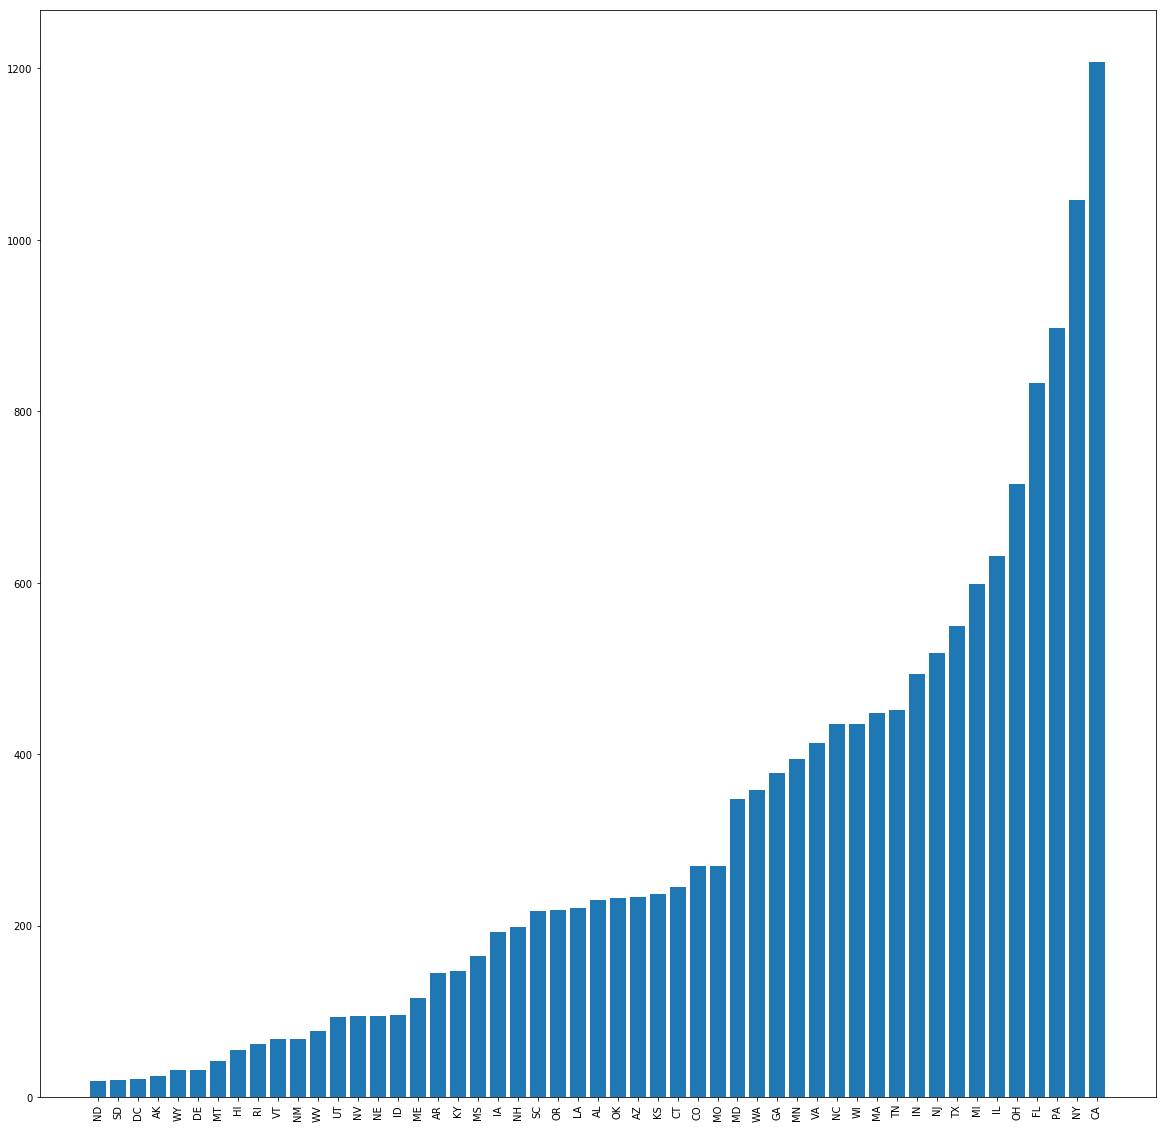

In [7]:
stateIds = [i for i in range(1, len(df.State.unique())+1) ]
plt.figure(figsize=(20,20))
plt.bar(stateIds, zipsPerState['number_of_zips'], align='center')
plt.xticks(stateIds, zipsPerState['State'], rotation='vertical')
plt.show()

In [8]:
dates = df.columns.tolist()[7:]

In [9]:
len(dates) # number of months

258

In [10]:
len(dates)/12 # number of years

21

In [11]:
dfTimeSeries = df[dates]

In [12]:
dfTimeSeries[dfTimeSeries.isnull().any(axis=1)].shape # 4841 rows - 1/3 of the data set contains at least one null record

(4841, 258)

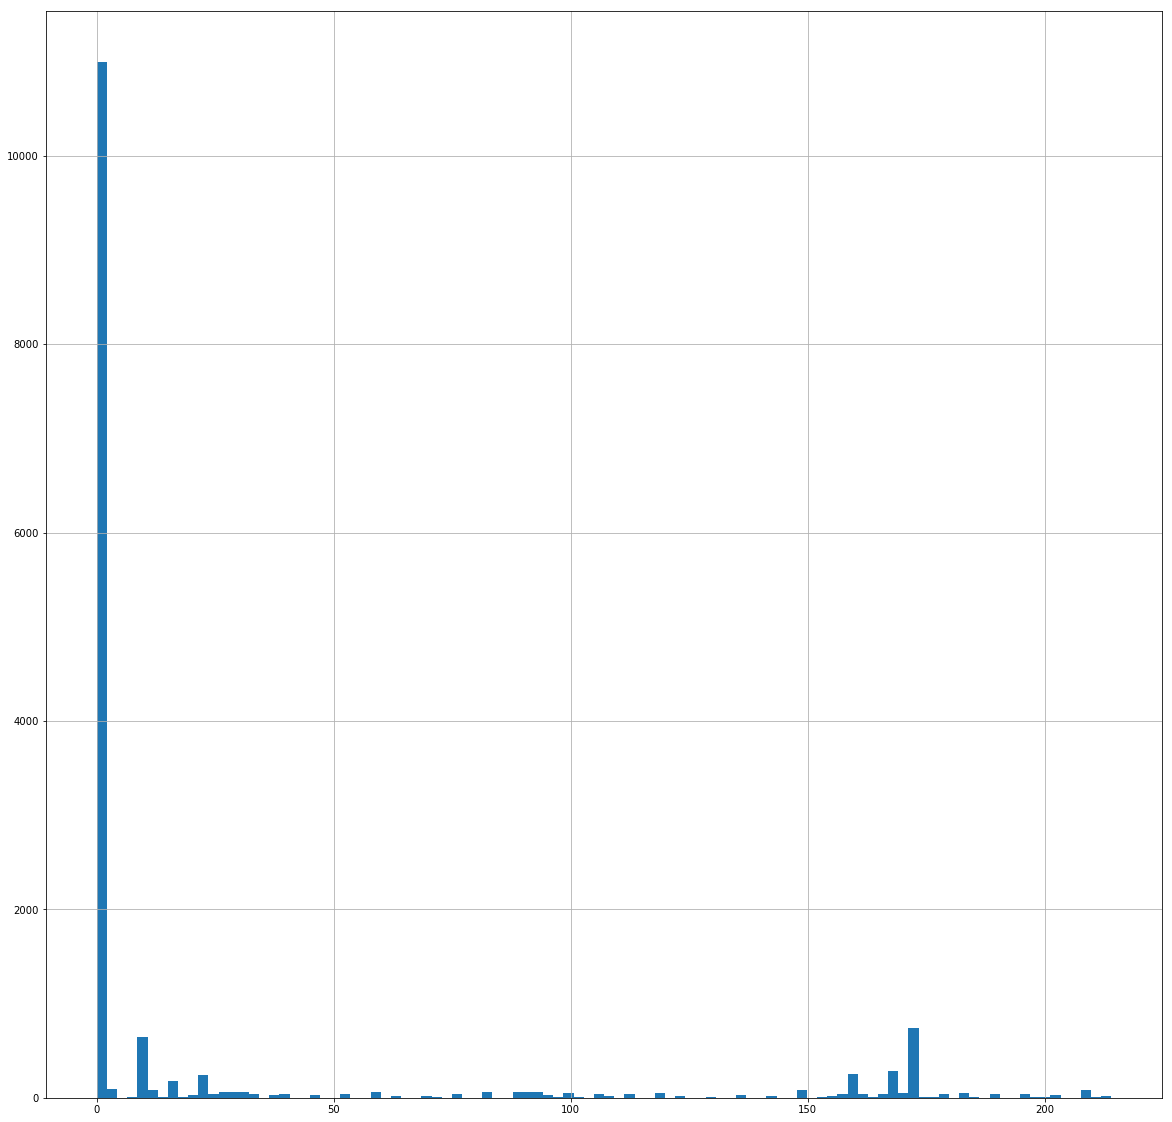

In [18]:
plt.figure(figsize=(20,20))
dfTimeSeries.isnull().sum(axis=1).hist(bins=100) # histogram of nan values contained in each row
# as we can see there are some rows for which 200 time spots are missing... (out of 258).
# but in general its not that bad as in a lot of rows are complete.